# Plotting Ternary Phase Diagrams and Using Triangular Axes

Often in thermodynamics, it is useful to use a two dimensional plot to express equilibria in a three component system with fixed potentials. The `ternplot` API provides a straightforward way to calculate equilibria and generate ternary phase diagrams. Alternatively, if you already have an equilibrium calculation, you can directly import and use `eqplot`.

## ternplot

Here we will use the ternplot API to plot an isothermal section of the Al-Cu-Y system from the thermodynamic database found at Jacob et al, Calphad 54 (2016) (1-15) (https://doi.org/10.1016/j.calphad.2016.04.013)

CPU times: total: 29 s
Wall time: 29.4 s


<TriangularAxes: title={'center': 'Cr-Fe-Nb'}, xlabel='X(Cr)', ylabel='X(Fe)'>

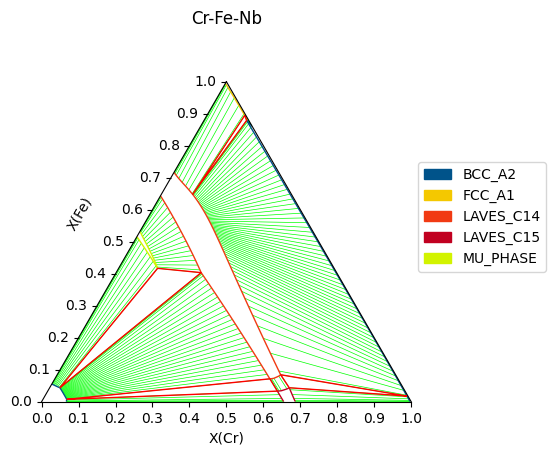

In [1]:
%matplotlib inline
from pycalphad import Database, ternplot
from pycalphad import variables as v

db_cr_fe_nb = Database('CrFeNb_Jacob2016.tdb')
comps = ['CR', 'FE', 'NB', 'VA']
phases = list(db_cr_fe_nb.phases.keys())
conds = {v.T: 1323, v.P:101325, v.X('CR'): (0,1,0.015), v.X('FE'): (0,1,0.015)}

%time ternplot(db_cr_fe_nb, comps, phases, conds, x=v.X('CR'), y=v.X('FE'))

Here is another example for plotting the isothermal section of the Al-Cu-Y system from the thermodynamic database found at the [NIST CALPHAD assessments](http://hdl.handle.net/11115/101) assessed by Zhang et al. [Calphad 35 (2011)](https://doi.org/10.1016/j.calphad.2011.09.008). Labels for phases in the three-phase equilibria can be added for clarity.

CPU times: total: 29.1 s
Wall time: 29.1 s


<TriangularAxes: title={'center': 'Al-Cu-Y'}, xlabel='X(Al)', ylabel='X(Y)'>

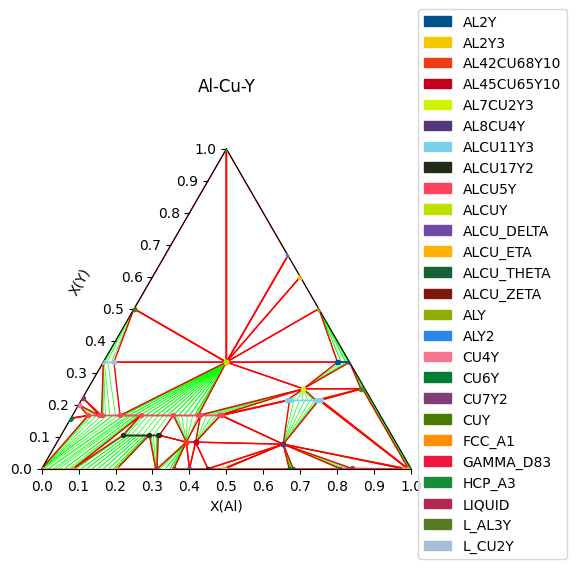

In [2]:
%matplotlib inline
from pycalphad import Database, ternplot
from pycalphad import variables as v

db_al_cu_y = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
phases = list(db_al_cu_y.phases.keys())
conds = {v.T: 830, v.P:101325, v.X('AL'): (0,1,0.015), v.X('Y'): (0,1,0.015)}

%time ternplot(db_al_cu_y, comps, phases, conds, x=v.X('AL'), y=v.X('Y'), label_nodes=True)

## Molar Ratios and Linear Combination Conditions

In [3]:
from pycalphad import Database, Workspace, variables as v

db_al_cu_y = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
phases = list(db_al_cu_y.phases.keys())
conds = {v.T: 830, v.P:101325,
         v.X('AL')/v.X('CU'): 5, # molar ratio condition
         0.1 * v.X('Y') + v.X('AL'): 0.6} # linear combination of mole fractions condition
wks = Workspace(db_al_cu_y, comps, phases, conds)
print(wks.get('X(AL)', 'X(CU)', 'X(Y)'))

[array(0.56818182), array(0.11363636), array(0.31818182)]
